In [8]:
// Bootstrap ImageJ. This may take some minutes the first time,
// but will be fast on subsequent runs on the same computer.
classpath.addRepository("http://maven.imagej.net/content/groups/public")
classpath.add("net.imagej" % "imagej" % "2.0.0-rc-50")

0 new artifact(s)


In [14]:
///////////////////////////////////////////////////////////////////////////////
// Define an object which houses some handy notebook functions. In particular,
// we include a way to display ImgLib images (i.e., RandomAccessibleInterval
// objects) directly inside the notebook here.

import java.awt.image.BufferedImage
import java.util.ArrayList
import net.imagej.display.ColorTables
import net.imglib2.RandomAccessibleInterval
import net.imglib2.converter.Converter
import net.imglib2.converter.RealLUTConverter
import net.imglib2.display.projector.composite.CompositeXYProjector
import net.imglib2.display.screenimage.awt.ARGBScreenImage
import net.imglib2.`type`.numeric.ARGBType
import net.imglib2.`type`.numeric.RealType

val notebook = new Object() {
  def display[T <: RealType[T]](source: RandomAccessibleInterval[T]): BufferedImage = {
    return display(source, 0, 1, 2)
  }
  def display[T <: RealType[T]](source: RandomAccessibleInterval[T], xAxis: Int, yAxis: Int, cAxis: Int): BufferedImage = {
    val w = source.dimension(xAxis).toInt
    val h = source.dimension(yAxis).toInt
    val c = source.dimension(cAxis).toInt
    val target = new ARGBScreenImage(w, h)
    val converters = new ArrayList[Converter[T, ARGBType]](c)
    for (i <- 0 until c) {
      converters.add(new RealLUTConverter[T](0, 255, ColorTables.getDefaultColorTable(i)))
    }
    val proj = new CompositeXYProjector(source, target, converters, cAxis)
    proj.setComposite(true)
    proj.map()
    return target.image()
  }
}

import java.awt.image.BufferedImage
import java.util.ArrayList
import net.imagej.display.ColorTables
import net.imglib2.RandomAccessibleInterval
import net.imglib2.converter.Converter
import net.imglib2.converter.RealLUTConverter
import net.imglib2.display.projector.composite.CompositeXYProjector
import net.imglib2.display.screenimage.awt.ARGBScreenImage
import net.imglib2.`type`.numeric.ARGBType
import net.imglib2.`type`.numeric.RealType
notebook: {def display[T <: net.imglib2.type.numeric.RealType[T]](source: net.imglib2.RandomAccessibleInterval[T]): java.awt.image.BufferedImage;def display[T <: net.imglib2.type.numeric.RealType[T]](source: net.imglib2.RandomAccessibleInterval[T],xAxis: Int,yAxis: Int,cAxis: Int): java.awt.image.BufferedImage} = cmd13$$user$$anonfun$1$$anon$1@79ae7f8b

In [15]:
import net.imagej.ImageJ

// create an ImageJ gateway
val ij = new ImageJ()

// load an image of a colorful bird
val toucanPath = "/Users/curtis/data/toucan.png"
val toucan = ij.scifio().datasetIO().open(toucanPath)

import net.imagej.ImageJ
ij: ImageJ = net.imagej.ImageJ@e08c4e4
toucanPath: String = "/Users/curtis/data/toucan.png"
toucan: net.imagej.Dataset = toucan.png

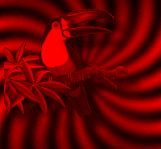

In [16]:
// Take a look at our toucan!
display.png(notebook.display(toucan.typedImg(new net.imglib2.`type`.numeric.integer.UnsignedByteType())))

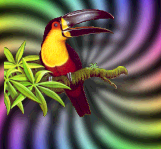

import java.io.File
import javax.imageio.ImageIO

In [17]:
import java.io.File
import javax.imageio.ImageIO
display.png(ImageIO.read(new File(toucanPath)))